<a href="https://colab.research.google.com/github/4212211046YuniLovitaSaribrHutajulu/ATS_4212211046_YuniLovitaSari/blob/main/4212211046_Yuni_Lovita_Sari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pustaka

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from skimage.feature import hog
from mlxtend.plotting import plot_confusion_matrix

Pemanggilan Dataset

In [4]:
train_data = pd.read_csv('/content/emnist-bymerge-train.csv', header=None)
test_data = pd.read_csv('/content/emnist-bymerge-test.csv', header=None)

Pembagian Sample dan Perubahan Jenis dari bilangan ke Image

In [5]:
X_train = train_data.iloc[:, 1:].values.reshape(-1, 28, 28).astype('float32') # Semua kolom kecuali yang pertama (label)
y_train = train_data.iloc[:, 0].values.astype('int') # Kolom pertama adalah label
X_test = test_data.iloc[:, 1:].values.reshape(-1, 28, 28).astype('float32')
y_test = test_data.iloc[:, 0].values.astype('int')

In [6]:
max_samples = 1000
if len(X_train) > max_samples:
  X_train = X_train[:max_samples]
  y_train = y_train[:max_samples]

if len(X_test) > max_samples:
  X_test = X_test[:max_samples]
  y_test = y_test[:max_samples]

Ekstraksi dataset dengan fitur HOG

In [7]:
hog_features_train = []
hog_images_train = []
for image in X_train:
  feature, hog_img = hog(image.reshape((28, 28)),
                         orientations=9,
                         pixels_per_cell=(8, 8),
                         cells_per_block=(2, 2),
                         visualize=True,
                         block_norm='L2')
  hog_features_train.append(feature)
  hog_images_train.append(hog_img)

hog_features_train_np = np.array(hog_features_train)
hog_images_train_np = np.array(hog_images_train)

hog_features_test = []
hog_images_test = []
for image in X_test:
  feature, hog_img = hog(image.reshape((28, 28)),
                         orientations=9,
                         pixels_per_cell=(8, 8),
                         cells_per_block=(2, 2),
                         visualize=True,
                         block_norm='L2')
  hog_features_test.append(feature)
  hog_images_test.append(hog_img)

hog_features_test_np = np.array(hog_features_test)
hog_images_test_np = np.array(hog_images_test)

Normalisasi data HOG

In [8]:
scaler = StandardScaler()
hog_features_train_scaled = scaler.fit_transform(hog_features_train_np)
hog_features_test_scaled = scaler.transform(hog_features_test_np)

Klasifikasi Data dengan SVM

In [9]:
clf = svm.SVC(kernel='rbf', C=1, gamma='scale')

Perhitungan dengan LOOVC berupa konfusi matriks, akurasi, presisi, recall, dan f1 score

In [10]:
loo = LeaveOneOut()
y_pred = cross_val_predict(clf, hog_features_train_scaled, y_train, cv=loo)
loo_confusion_matrix = confusion_matrix(y_train, y_pred)
loo_accuracy = accuracy_score(y_train, y_pred)
loo_precision = precision_score(y_train, y_pred, average='weighted')
loo_recall = recall_score(y_train, y_pred, average='weighted')
loo_f1 = f1_score(y_train, y_pred, average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
print("\nLOOCV Results (Training Data):")
print("Confusion Matrix:")
print(loo_confusion_matrix)
print("Accuracy:", loo_accuracy)
print("Precision:", loo_precision)
print("Recall:", loo_recall)
print("F1 Score:", loo_f1)


LOOCV Results (Training Data):
Confusion Matrix:
[[41  0  0 ...  0  0  0]
 [ 0 50  0 ...  0  0  0]
 [ 0  0 52 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0 16  1]
 [ 0  0  1 ...  0  0 16]]
Accuracy: 0.625
Precision: 0.5620162931674574
Recall: 0.625
F1 Score: 0.5709567283612091


In [12]:
def plot_confusion_mat(cm):
  fig, ax = plt.subplots(figsize=(10, 10))
  plot_confusion_matrix(conf_mat=cm, ax=ax, cmap=plt.cm.Blues)
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

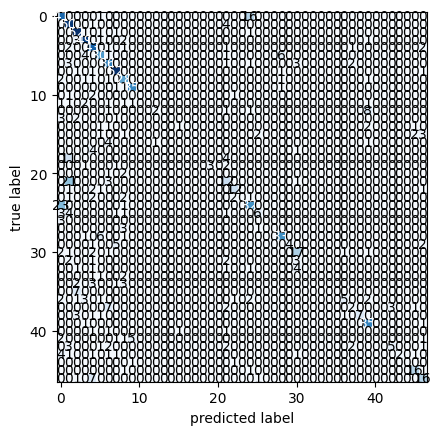

In [13]:
plot_confusion_matrix(loo_confusion_matrix)

Perbandingan antara gambar original dengan fitur ekstraksi HOG

In [14]:
def plot_images_with_hog(X, hog_images, title=""):
  fig, axes = plt.subplots(2, 10, figsize=(15, 5))
  fig.suptitle(title)

  # Plot original images
  for i in range(min(len(X), 10)):
    axes[0, i].imshow(X[i].reshape((28, 28)), cmap='gray')
    axes[0, i].axis('off')

  # Plot HOG images
  for i in range(min(len(hog_images), 10)):
    axes[1, i].imshow(hog_images[i].reshape((28, 28)), cmap='gray')
    axes[1, i].axis('off')

  plt.show()

In [15]:
def extract_hog_images(images):
  hog_images = []
  for image in images:
    # Indent the following lines to be part of the for loop
    _,  hog_img = hog(image.reshape((28, 28)),
                      orientations=9,
                      pixels_per_cell=(8, 8),
                      cells_per_block=(2, 2),
                      visualize=True,
                      block_norm='L2')
    hog_images.append(hog_img)
  return np.array(hog_images)

In [16]:
hog_images_train = extract_hog_images(X_train)

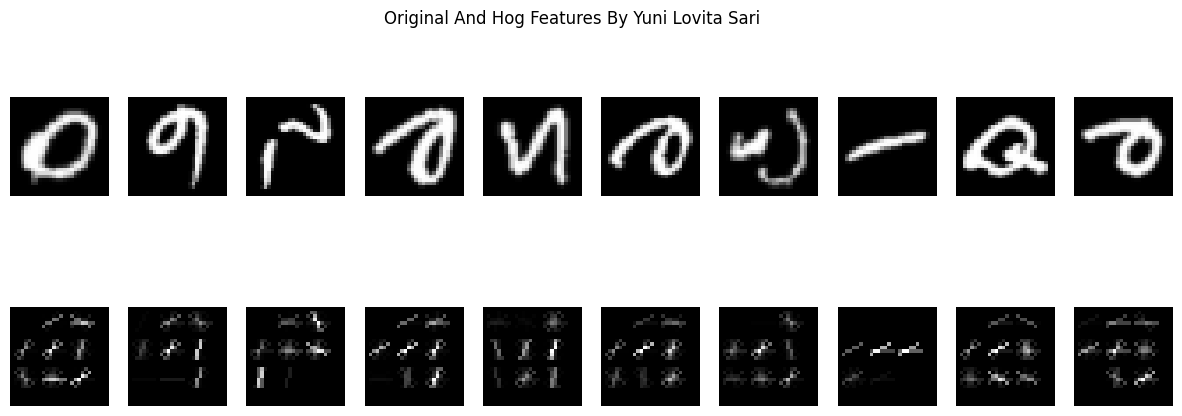

In [18]:
plot_images_with_hog(X_train, hog_images_train, title='Original And Hog Features By Yuni Lovita Sari')